In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set figure size for charts
figsize_x = 14
figsize_y = 10

In [2]:
# Read crime and unemployment csv File and store into Pandas data frame
crime_unemploy_data = pd.read_csv("crime_unemployment.csv")

#drop any nan or empty rows
crime_unemploy_data = crime_unemploy_data.dropna()

#create dataframe from csv file
crime_unemploy_data_df = pd.DataFrame(crime_unemploy_data)

#select columns to be used for analysis 
crime_unemploy_data_df = crime_unemploy_data_df[['State', 'Average Crime Rate', 'Labor Force', 'Unemployed']]

#display dataframe
crime_unemploy_data_df.head()

,State,Average Crime Rate,Labor Force,Unemployed
0,AK,289,356886,23510
1,AL,386,2198844,86493
2,AR,335,1351498,50038
3,AZ,353,3439758,166205
4,CA,416,19398212,815409


In [3]:
# Read tax, home price csv File and store into Pandas data frame
tax_homeprice_data = pd.read_csv("tax_homeprice.csv")

#drop any nan or empty rows
tax_homeprice_data = tax_homeprice_data.dropna()

#create dataframe from csv file
tax_homeprice_data_df = pd.DataFrame(tax_homeprice_data)

#rename Total Tax to Total State Tax, Annual Median to Annual Home Price
tax_homeprice_data_df = tax_homeprice_data_df.rename(columns={'Total Tax': 'Total State Tax', 
                                                              'Annual Median': 'Annual Home Price'})

#display dataframe
tax_homeprice_data_df.head()

,State,Total State Tax,Annual Home Price
0,AL,11055577.0,133891.67
1,AK,1641733.0,310387.50
2,AZ,16293917.0,240816.67
3,AR,9843173.0,127237.50
4,CA,175016884.0,560075.00


,State,Annual Wages per Employee
0,AK,28173
1,AL,31376
2,AR,26772
3,AZ,37922
4,CA,36494


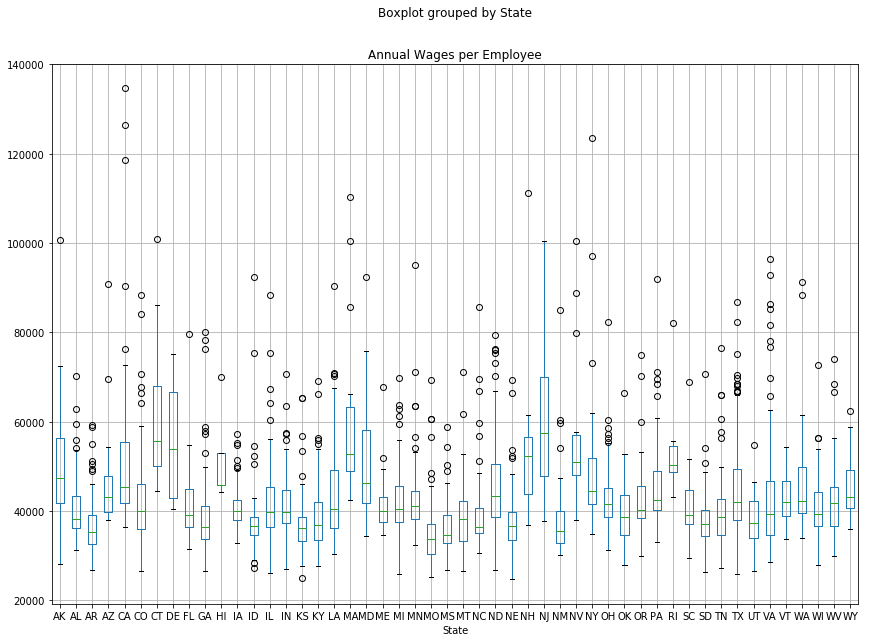

In [4]:
# Read salary csv File and store into Pandas data frame
salary_data = pd.read_csv("salary.csv")

#drop any nan or empty rows
salary_data = salary_data.dropna()

#create dataframe from csv file
salary_data_df = pd.DataFrame(salary_data)

# Create a boxplots to visualize the spread for wages
salary_data_df.boxplot("Annual Wages per Employee", by="State", figsize=(figsize_x, figsize_y))

#select columns to be used for analysis 
salary_data_df = salary_data_df[['Annual Wages per Employee', 'State']]

#groupby by State and calculate median for numeric columns
salary_data_df = salary_data_df.groupby(['State']).min()

#reset index
salary_data_df = salary_data_df.reset_index()

#round Annual Average Employment since can't have it in decimal points
salary_data_df = salary_data_df.round({'Annual Average Employment': 0})

#display dataframe
salary_data_df.head()

In [5]:
#merge all 3 dataframes
overall_df = pd.merge(crime_unemploy_data_df, tax_homeprice_data_df, on="State", how="outer")
overall_df = pd.merge(overall_df, salary_data_df, on="State", how="outer")

#drop row if NaN exists
overall_df = overall_df.dropna()

#display dataframe
overall_df.head()

,State,Average Crime Rate,Labor Force,Unemployed,Total State Tax,Annual Home Price,Annual Wages per Employee
0,AK,289,356886,23510,1641733.0,310387.50,28173.0
1,AL,386,2198844,86493,11055577.0,133891.67,31376.0
2,AR,335,1351498,50038,9843173.0,127237.50,26772.0
3,AZ,353,3439758,166205,16293917.0,240816.67,37922.0
4,CA,416,19398212,815409,175016884.0,560075.00,36494.0


In [6]:
overall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 7 columns):
State                        50 non-null object
Average Crime Rate           50 non-null int64
Labor Force                  50 non-null int64
Unemployed                   50 non-null int64
Total State Tax              50 non-null float64
Annual Home Price            50 non-null float64
Annual Wages per Employee    50 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.1+ KB


In [7]:
#calculate crime and unemployment against labor force%
overall_df['Crime Rate / Labor Force'] = overall_df['Average Crime Rate']/overall_df['Labor Force']*100
overall_df['Unemployed / Labor Force'] = overall_df['Unemployed']/overall_df['Labor Force']*100

#create a ref dataframe
overall_ref_df = overall_df

#Weight Summed Analysis to rank 
no_of_metrics = 6

#Assigning weightage for each attribute
metric_weightage = 1/no_of_metrics

#Get the max for Temp High, Temp Low and Percipitation Inches but min for Snow Inches as snow condition is less favorable
crime_rate_min = overall_df['Average Crime Rate'].min()
labor_force_max = overall_df['Labor Force'].max()
unemployed_min = overall_df['Unemployed'].min()
total_state_tax_min = overall_df['Total State Tax'].min()
home_price_min = overall_df['Annual Home Price'].min()
wages_max = overall_df['Annual Wages per Employee'].max()

#calculate Weighted Sum Analysis for each climate attribute and sum them to get a final value
overall_df['Crime Rate WSA'] = overall_df['Average Crime Rate']/crime_rate_min*metric_weightage
overall_df['Labor Force WSA'] = overall_df['Labor Force']/labor_force_max*metric_weightage
overall_df['Unemployed WSA'] = overall_df['Unemployed']/unemployed_min*metric_weightage
overall_df['Total State Tax WSA'] = overall_df['Total State Tax']/total_state_tax_min*metric_weightage
overall_df['Home Price WSA'] = overall_df['Annual Home Price']/home_price_min*metric_weightage
overall_df['Wages WSA'] = overall_df['Annual Wages per Employee']/wages_max*metric_weightage

overall_df['Total WSA'] = overall_df['Crime Rate WSA']+overall_df['Labor Force WSA']+overall_df['Unemployed WSA']+overall_df['Total State Tax WSA']+overall_df['Home Price WSA']+overall_df['Wages WSA']

#display dataframe
overall_df.head()

,State,Average Crime Rate,Labor Force,Unemployed,Total State Tax,Annual Home Price,Annual Wages per Employee,Crime Rate / Labor Force,Unemployed / Labor Force,Crime Rate WSA,Labor Force WSA,Unemployed WSA,Total State Tax WSA,Home Price WSA,Wages WSA,Total WSA
0,AK,289,356886,23510,1641733.0,310387.50,28173.0,0.080978,6.587538,0.776882,0.003066,0.424844,0.166667,0.509291,0.105514,1.986264
1,AL,386,2198844,86493,11055577.0,133891.67,31376.0,0.017555,3.933567,1.037634,0.018892,1.562995,1.122348,0.219693,0.117510,4.079073
2,AR,335,1351498,50038,9843173.0,127237.50,26772.0,0.024787,3.702410,0.900538,0.011612,0.904225,0.999267,0.208774,0.100267,3.124683
3,AZ,353,3439758,166205,16293917.0,240816.67,37922.0,0.010262,4.831881,0.948925,0.029554,3.003452,1.654138,0.395138,0.142027,6.173233
4,CA,416,19398212,815409,175016884.0,560075.00,36494.0,0.002145,4.203527,1.118280,0.166667,14.735065,17.767494,0.918984,0.136679,34.843167


In [8]:
#sort dataframe by lowest WSA
overall_df = overall_df.sort_values(by=['Total WSA'])

#display dataframe
overall_df.head(50)

,State,Average Crime Rate,Labor Force,Unemployed,Total State Tax,Annual Home Price,Annual Wages per Employee,Crime Rate / Labor Force,Unemployed / Labor Force,Crime Rate WSA,Labor Force WSA,Unemployed WSA,Total State Tax WSA,Home Price WSA,Wages WSA,Total WSA
41,SD,99,459462,13860,1917548.0,201525.000,26268.0,0.021547,3.016572,0.266129,0.003948,0.250461,0.194667,0.330667,0.098380,1.144251
46,VT,119,346061,9223,3284231.0,198525.000,33836.0,0.034387,2.665137,0.319892,0.002973,0.166667,0.333411,0.325745,0.126724,1.275412
28,ND,94,404302,10546,4205184.0,192150.000,26802.0,0.023250,2.608446,0.252688,0.003474,0.190574,0.426905,0.315284,0.100380,1.289305
50,WY,155,289576,11755,1837401.0,220241.665,35939.0,0.053527,4.059383,0.416667,0.002488,0.212422,0.186531,0.361378,0.134600,1.314085
29,NE,62,1020205,28513,5393093.0,164125.000,24736.0,0.006077,2.794830,0.166667,0.008765,0.515252,0.547500,0.269300,0.092642,1.600126
26,MT,183,528250,19659,2944827.0,225283.330,26656.0,0.034643,3.721533,0.491935,0.004539,0.355253,0.298955,0.369650,0.099833,1.620166
30,NH,160,761750,19239,2920888.0,250870.835,36955.0,0.021004,2.525632,0.430108,0.006545,0.347663,0.296525,0.411635,0.138405,1.630881
21,ME,116,698749,23527,4410632.0,216150.000,34663.0,0.016601,3.367017,0.311828,0.006004,0.425151,0.447762,0.354664,0.129821,1.675229
39,RI,158,555807,22636,3483100.0,281462.500,43074.0,0.028427,4.072637,0.424731,0.004775,0.409050,0.353600,0.461830,0.161322,1.815309
13,ID,157,857054,24321,4848359.0,216508.330,27350.0,0.018319,2.837744,0.422043,0.007364,0.439499,0.492199,0.355252,0.102432,1.818789


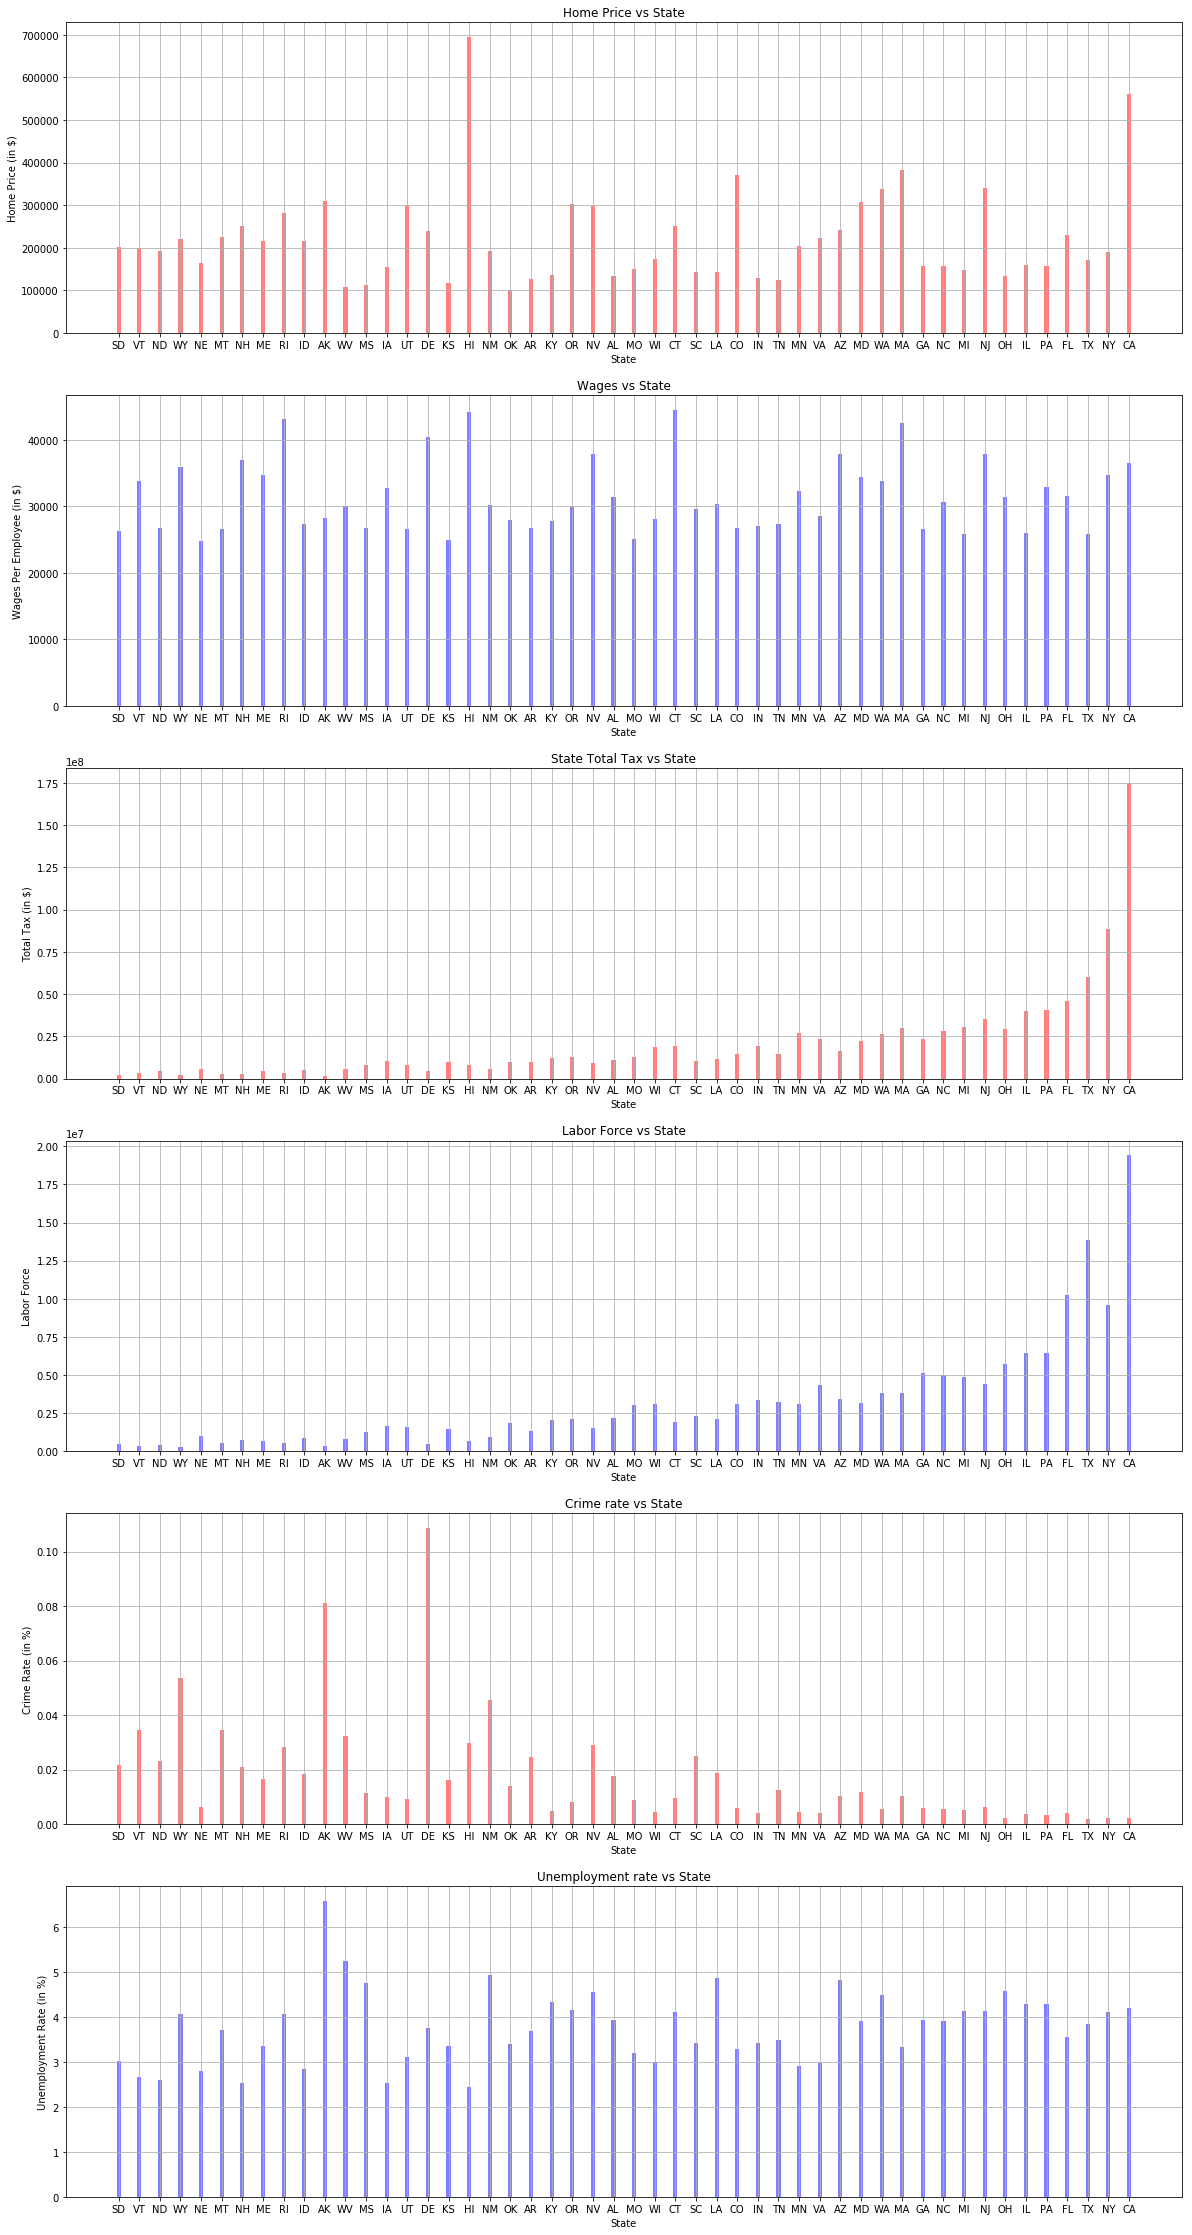

In [9]:
#save dataframe to csv file
overall_df.to_csv('final_choice_state.csv', index=False)

#setting bar stick width
width = 0.2
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=False, figsize=(20, 40))

#plot home price vs State as bar chart
ax1.grid()
ax1.set_title(f'Home Price vs State')
ax1.set_xlabel("State")
ax1.set_ylabel("Home Price (in $)")
ax1.bar(overall_df['State'], overall_df['Annual Home Price'], width=width, align='center', alpha=0.5, color='r')

#plot wages vs State as bar chart
ax2.grid()
ax2.set_title(f'Wages vs State')
ax2.set_xlabel("State")
ax2.set_ylabel("Wages Per Employee (in $)")
ax2.bar(overall_df['State'], overall_df['Annual Wages per Employee'], width=width, align='center', alpha=0.5, color='b')

#plot tax vs State as bar chart
ax3.grid()
ax3.set_title(f'State Total Tax vs State')
ax3.set_xlabel("State")
ax3.set_ylabel("Total Tax (in $)")
ax3.bar(overall_df['State'], overall_df['Total State Tax'], width=width, align='center', alpha=0.5, color='r')

#plot labor force vs State as bar chart
ax4.grid()
ax4.set_title(f'Labor Force vs State')
ax4.set_xlabel("State")
ax4.set_ylabel("Labor Force")
ax4.bar(overall_df['State'], overall_df['Labor Force'], width=width, align='center', alpha=0.5, color='b')

#plot crime rate vs State as bar chart
ax5.grid()
ax5.set_title(f'Crime rate vs State')
ax5.set_xlabel("State")
ax5.set_ylabel("Crime Rate (in %)")
ax5.bar(overall_df['State'], overall_df['Crime Rate / Labor Force'], width=width, align='center', alpha=0.5, color='r')

#plot unemployment rate vs State as bar chart
ax6.grid()
ax6.set_title(f'Unemployment rate vs State')
ax6.set_xlabel("State")
ax6.set_ylabel("Unemployment Rate (in %)")
ax6.bar(overall_df['State'], overall_df['Unemployed / Labor Force'], width=width, align='center', alpha=0.5, color='b')

#save the Figure
plt.savefig("Final_Conclusion_Images/Overall_plots.png")

In [10]:
#copy ref dataframe to compute new WSA table
overall_two_df = overall_ref_df

#weightage assignment
crime_weight = 0.1
labor_weight = 0.1
unemployment_weight = 0.2
tax_weight = 0.2
homeprice_weight = 0.2
wages_weight = 0.2

#calculate Weighted Sum Analysis for each climate attribute and sum them to get a final value
overall_two_df['Crime Rate WSA'] = overall_two_df['Average Crime Rate']/crime_rate_min*crime_weight
overall_two_df['Labor Force WSA'] = overall_two_df['Labor Force']/labor_force_max*labor_weight
overall_two_df['Unemployed WSA'] = overall_two_df['Unemployed']/unemployed_min*unemployment_weight
overall_two_df['Total State Tax WSA'] = overall_two_df['Total State Tax']/total_state_tax_min*tax_weight
overall_two_df['Home Price WSA'] = overall_two_df['Annual Home Price']/home_price_min*homeprice_weight
overall_two_df['Wages WSA'] = overall_two_df['Annual Wages per Employee']/wages_max*wages_weight

overall_two_df['Total WSA'] = overall_two_df['Crime Rate WSA']+overall_two_df['Labor Force WSA']+overall_two_df['Unemployed WSA']+overall_two_df['Total State Tax WSA']+overall_two_df['Home Price WSA']+overall_two_df['Wages WSA']

#sort dataframe by lowest WSA
overall_two_df = overall_two_df.sort_values(by=['Total WSA'])

#display dataframe
overall_two_df.head(50)

,State,Average Crime Rate,Labor Force,Unemployed,Total State Tax,Annual Home Price,Annual Wages per Employee,Crime Rate / Labor Force,Unemployed / Labor Force,Crime Rate WSA,Labor Force WSA,Unemployed WSA,Total State Tax WSA,Home Price WSA,Wages WSA,Total WSA
41,SD,99,459462,13860,1917548.0,201525.000,26268.0,0.021547,3.016572,0.159677,0.002369,0.300553,0.233600,0.396800,0.118056,1.211056
50,WY,155,289576,11755,1837401.0,220241.665,35939.0,0.053527,4.059383,0.250000,0.001493,0.254906,0.223837,0.433653,0.161520,1.325409
46,VT,119,346061,9223,3284231.0,198525.000,33836.0,0.034387,2.665137,0.191935,0.001784,0.200000,0.400093,0.390893,0.152068,1.336775
28,ND,94,404302,10546,4205184.0,192150.000,26802.0,0.023250,2.608446,0.151613,0.002084,0.228689,0.512286,0.378341,0.120456,1.393469
26,MT,183,528250,19659,2944827.0,225283.330,26656.0,0.034643,3.721533,0.295161,0.002723,0.426304,0.358746,0.443580,0.119800,1.646314
30,NH,160,761750,19239,2920888.0,250870.835,36955.0,0.021004,2.525632,0.258065,0.003927,0.417196,0.355830,0.493962,0.166086,1.695065
29,NE,62,1020205,28513,5393093.0,164125.000,24736.0,0.006077,2.794830,0.100000,0.005259,0.618302,0.657000,0.323160,0.111171,1.814892
21,ME,116,698749,23527,4410632.0,216150.000,34663.0,0.016601,3.367017,0.187097,0.003602,0.510181,0.537314,0.425597,0.155785,1.819576
0,AK,289,356886,23510,1641733.0,310387.500,28173.0,0.080978,6.587538,0.466129,0.001840,0.509812,0.200000,0.611149,0.126617,1.915548
39,RI,158,555807,22636,3483100.0,281462.500,43074.0,0.028427,4.072637,0.254839,0.002865,0.490860,0.424320,0.554196,0.193587,1.920667


In [11]:
#save dataframe to csv file
overall_two_df.to_csv('final_choice_state_two.csv', index=False)